<a href="https://colab.research.google.com/github/AlexaZebra/Coursework/blob/main/EDA_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-darkgrid')
import seaborn as sns 

<ipython-input-4-2ac73ea1e046>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [122]:
netflix_overall = pd.read_csv('netflix_titles.csv')
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


Проверка датасета на пропуски

In [7]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Пропуски есть и больше всего в столбце режиссер (director), но в целом не так много

Разбиваем данные на сериалы и фильмы, чтобы вести дальнейшую аналитику по отдельности

In [8]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()

In [9]:
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie'].copy()

Text(0, 0.5, 'Density')

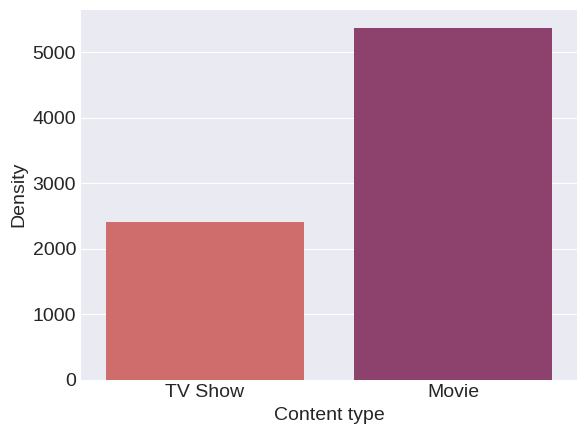

In [10]:
ax = sns.countplot(x = 'type', data = netflix_overall, palette = 'flare')
plt.xlabel('Content type')
plt.ylabel('Density')

В исходных данных получается, что фильмов на Netflix в два раза больше, чем сериалов

# Популярное время длительности

Сколько длятся по времени фильмы и сериалы на Нетфлексе

In [11]:
topdirs = pd.value_counts(netflix_overall['duration'])
topdirs

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [12]:
from plotly import graph_objects as go
fig = go.Figure([
    go.Bar(x = topdirs.index, y = topdirs.values, text = topdirs.values, marker_color = 'indigo')
])
fig.update_traces(texttemplate = '%{text:.2s}', textposition = 'outside')

Самая популярная длительность сериалов это 1-3 сезона, у фильмов около часа

# Какое время самое привлекательное для релиза контента?

Проверим, есть ли пропуски в дате публикации на платформу

In [13]:
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Их всего лишь 10 штук, поэтому их можно удалить

In [14]:
netflix_date = netflix_overall[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

Теперь возьмем только признак дату и из нее возьмем только месяц и год

In [15]:
netflix_date.head()

,date_added
0,"August 14, 2020"
1,"December 23, 2016"
2,"December 20, 2018"
3,"November 16, 2017"
4,"January 1, 2020"


In [16]:
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'зима'
    elif month in ['March', 'April', 'May']:
        return 'весна'
    elif month in ['June', 'July', 'August']:
        return 'лето'
    else:
        return 'осень'

In [17]:
from datetime import datetime
from dateutil.parser import parse

netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date['day'] = netflix_date['date_added'].apply(lambda x : x.split()[1].rstrip(','))
netflix_date['weekday'] = netflix_date['date_added'].apply(lambda x: parse(str(x)).strftime("%A"))
netflix_date['season'] = netflix_date['month'].apply(get_season)

netflix_date.head()

,date_added,year,month,day,weekday,season
0,"August 14, 2020",2020,August,14,Friday,лето
1,"December 23, 2016",2016,December,23,Friday,зима
2,"December 20, 2018",2018,December,20,Thursday,зима
3,"November 16, 2017",2017,November,16,Thursday,осень
4,"January 1, 2020",2020,January,1,Wednesday,зима


Теперь отсортируем от самого раннего добавления фильма к самому последнему

In [18]:
netflix_date.sort_values(by = ['year', 'month'])

,date_added,year,month,day,weekday,season
1765,"February 4, 2008",2008,February,4,Monday,зима
7113,"January 1, 2008",2008,January,1,Tuesday,зима
3248,"May 5, 2009",2009,May,5,Tuesday,весна
5765,"November 18, 2009",2009,November,18,Wednesday,осень
3840,"November 1, 2010",2010,November,1,Monday,осень
...,...,...,...,...,...,...
7351,"January 1, 2021",2021,January,1,Friday,зима
7551,"January 1, 2021",2021,January,1,Friday,зима
7569,"January 15, 2021",2021,January,15,Friday,зима
7570,"January 1, 2021",2021,January,1,Friday,зима


Видим, что основная часть публикаций начинается с 2013 года 

Список, отсортированный по месяцам в каждом году

In [19]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,23.0,96.0,118.0,190.0,222.0,175.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,5.0,4.0,46.0,88.0,160.0,272.0,158.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,15.0,52.0,131.0,192.0,204.0,173.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,119.0,127.0,136.0,178.0,0.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,41.0,115.0,169.0,145.0,144.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,29.0,80.0,157.0,169.0,156.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,95.0,78.0,175.0,167.0,0.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,13.0,88.0,101.0,159.0,173.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,95.0,118.0,171.0,188.0,0.0


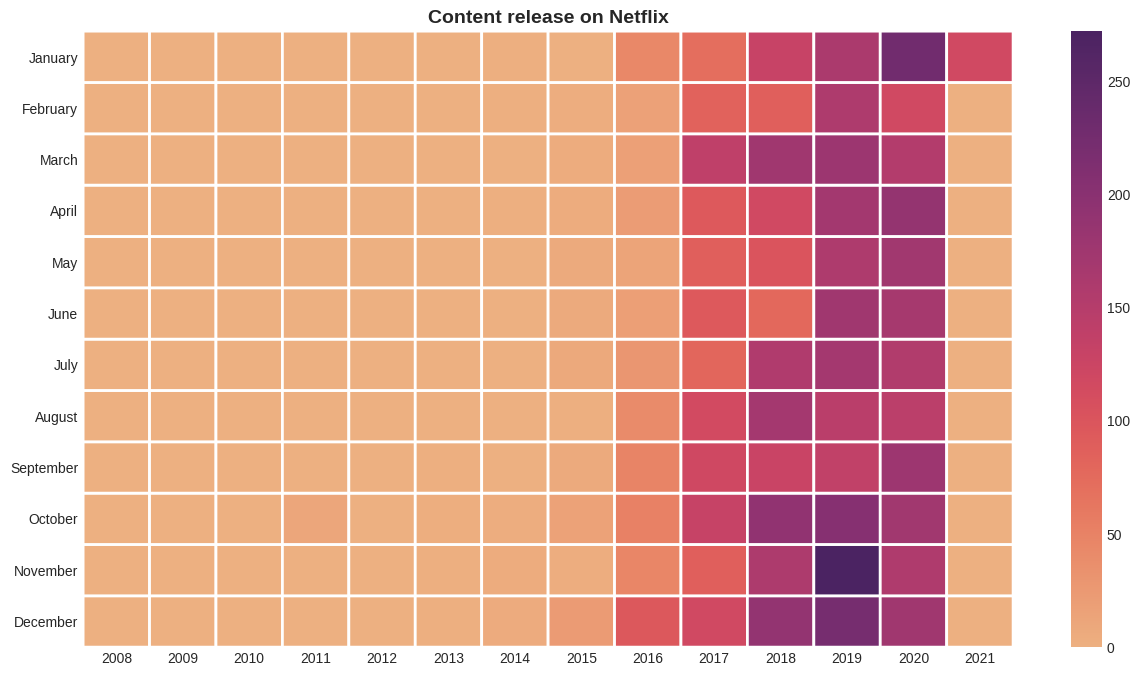

In [20]:
plt.figure( figsize=(15,8))
plt.pcolor(df, cmap = 'flare', edgecolors = 'white', linewidths = 2)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize = 10)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize = 10)

plt.title('Сontent release on Netflix', fontsize = 14, fontweight = 'bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize = 10)
plt.show()

декабрь и январь достаточно прибыльные месяцы из-за праздников, однако в 2019 году в эти месяцы выпустилось довольно мало контента

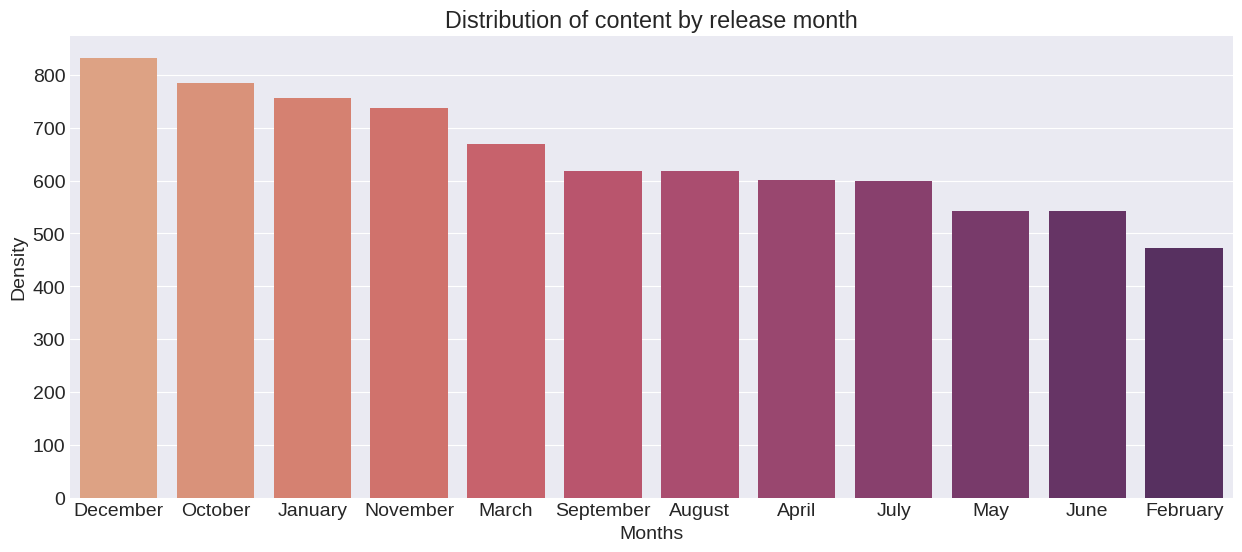

In [21]:
order = netflix_date['month'].value_counts().index

plt.figure(figsize=(15,6))
sns.countplot(x ='month', data=netflix_date, order = order, palette = 'flare')
plt.title ('Distribution of content by release month')
plt.xlabel('Months')
plt.ylabel('Density')
plt.show()

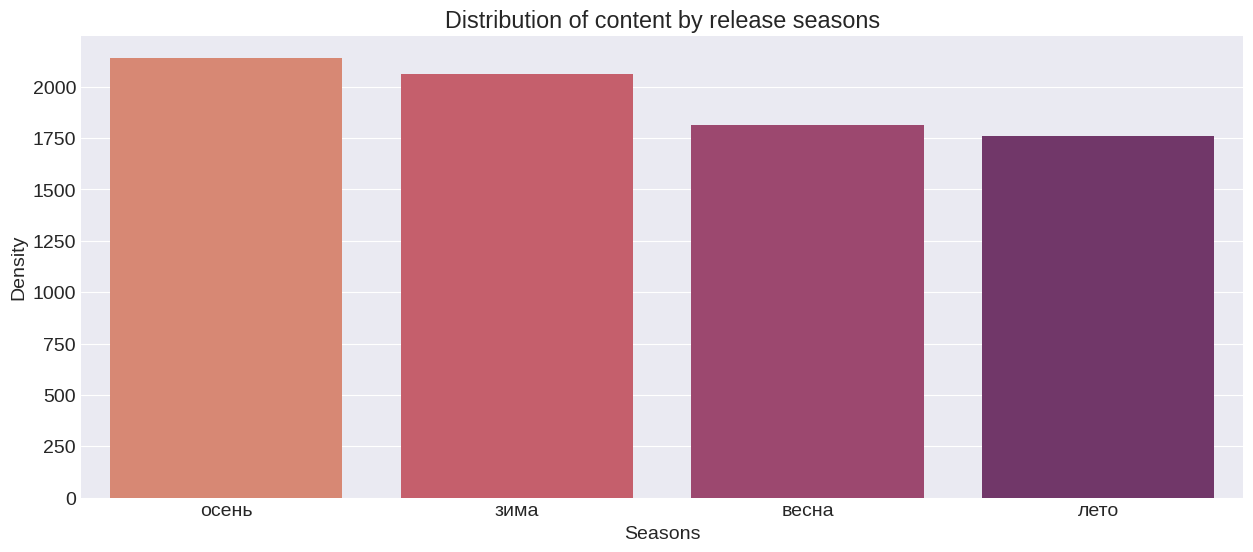

In [22]:
order = netflix_date['season'].value_counts().index

plt.figure(figsize=(15,6))
sns.countplot(x ='season', data=netflix_date, order = order, palette = 'flare')
plt.title ('Distribution of content by release seasons')
plt.xlabel('Seasons')
plt.ylabel('Density')
plt.show()

In [23]:
df1 = pd.concat([netflix_overall['title'], netflix_date['day'], netflix_date['weekday']], axis=1).dropna()
df1

,title,day,weekday
0,3%,14,Friday
1,7:19,23,Friday
2,23:59,20,Thursday
3,9,16,Thursday
4,21,1,Wednesday
...,...,...,...
7782,Zozo,19,Monday
7783,Zubaan,2,Saturday
7784,Zulu Man in Japan,25,Friday
7785,Zumbo's Just Desserts,31,Saturday


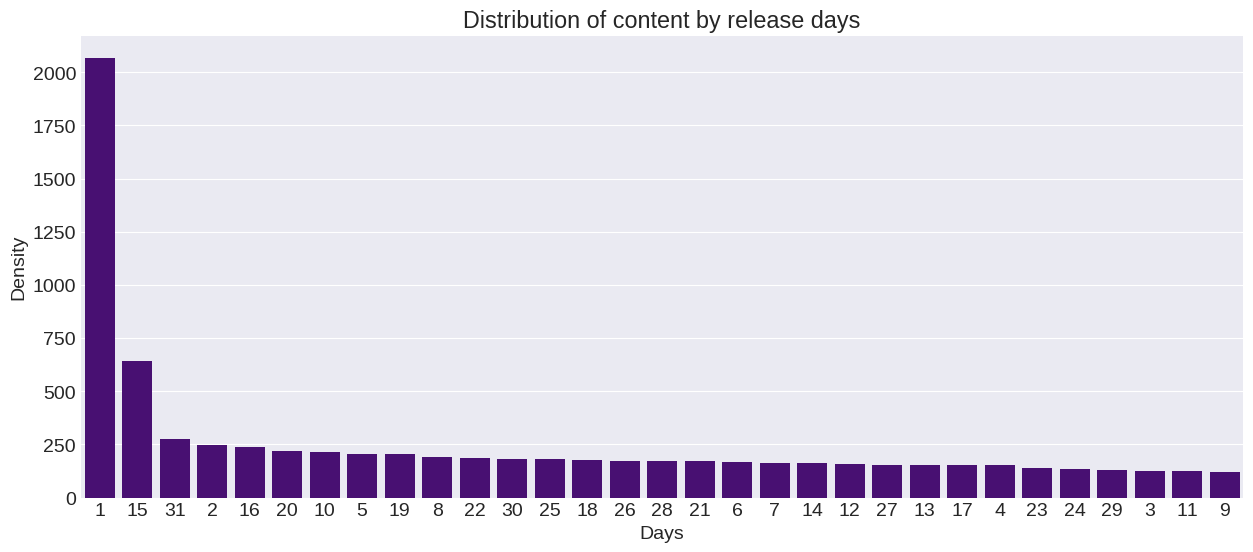

In [24]:
order = df1['day'].value_counts().index

plt.figure(figsize=(15,6))
sns.countplot(x='day', data=df1, color = 'indigo', order = order)
plt.title ('Distribution of content by release days')
plt.xlabel('Days')
plt.ylabel('Density')
plt.show()

первого числа каждого месяца добавлялось больше всего контента.

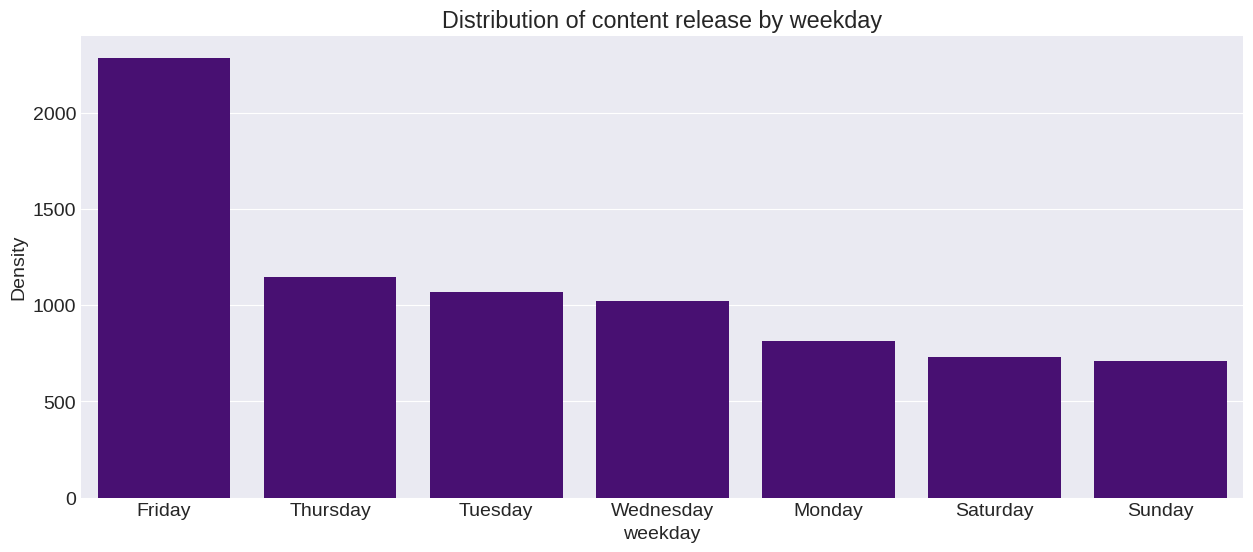

In [25]:
order = df1['weekday'].value_counts().index

plt.figure(figsize=(15,6))
sns.countplot(x='weekday', data=df1, color = 'indigo', order = order)
plt.title ('Distribution of content release by weekday')
plt.ylabel('Density')
plt.show()

Больше всего контента выпускается в пятницу

# Анализ фильмов

## Анализ возрастного рейтинга фильмов

Возьмем топ 20 фильмов

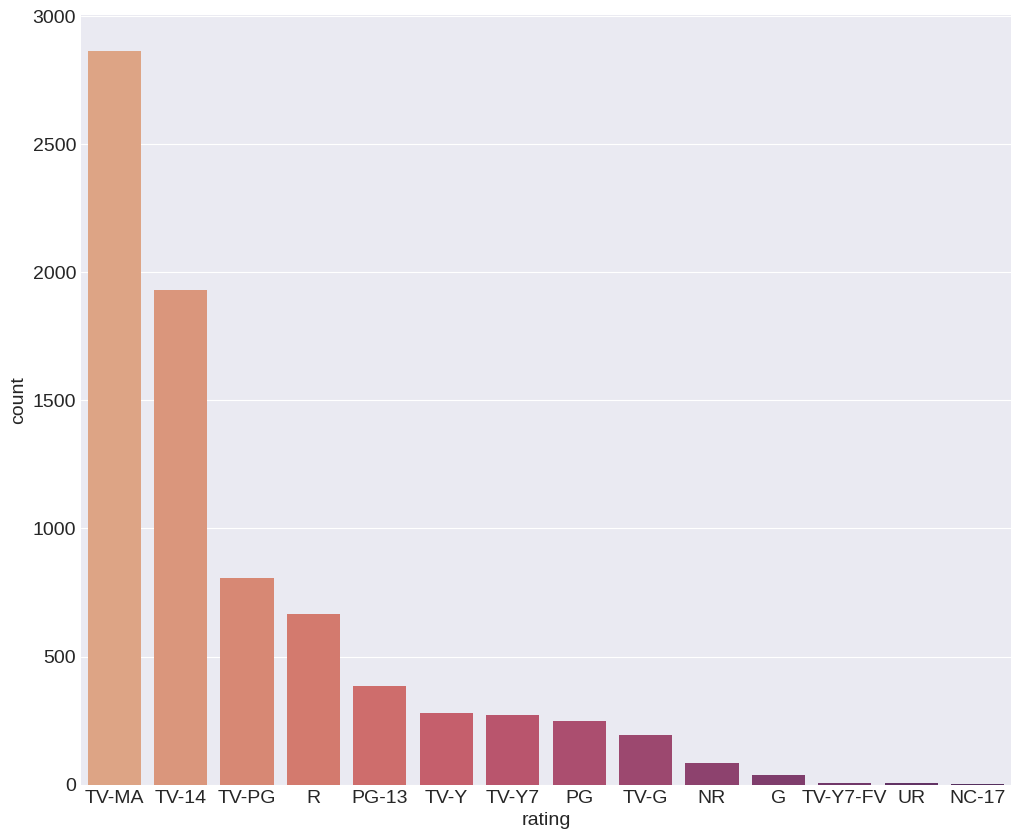

In [26]:
# выбираем нужный стобец в датасете фильмов и выводим количество фильмов в каждом рейтинге

plt.figure(figsize = (12,10))
ax = sns.countplot(x = 'rating', data = netflix_overall, palette = 'flare', order = netflix_overall['rating'].value_counts().index)

TV-MA - это фильмы для взрослой аудитории и эта группа самая большая.
TV-14 - это фильмы для 14+ лет, вторая по величине группа.
R - это фильмы для 17+ лет, третья по величине группа фильмов.

## Анализ года выпуска фильмов

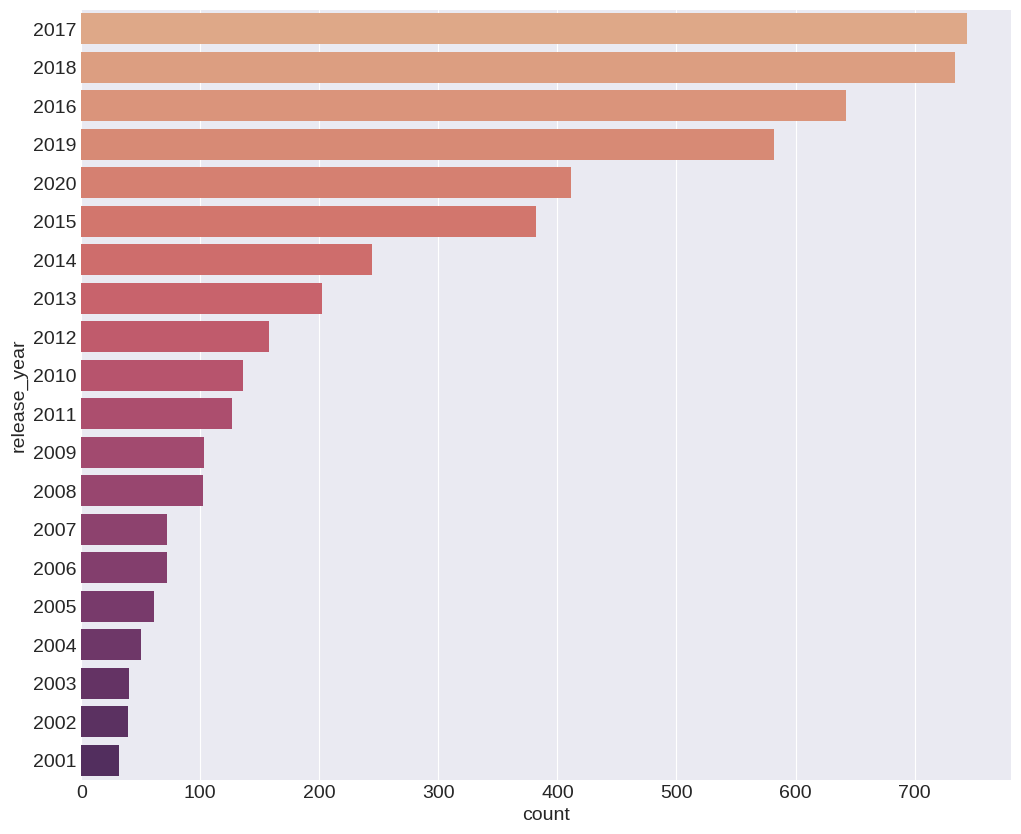

In [27]:
# выбираем нужный стобец в датасете фильмов и выводим количество фильмов каждого года из топ-20 
plt.figure(figsize = (12,10))
ax = sns.countplot(y = 'release_year', data = netflix_movies, palette = 'flare', order = netflix_movies['release_year'].value_counts().index[0:20])

В 2017 году вышло больше всего фильмов

## Топ 10 стран, которые выпускают фильмы

Проверим есть ли пропуски в признаке страна (country)

In [28]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        163
cast            426
country         230
date_added        0
release_year      0
rating            5
duration          0
listed_in         0
description       0
dtype: int64

Пропуски есть и их достаточно много, поэтому заменим их на категорию unknown

In [29]:
netflix_movies['country'].fillna('Unknown', inplace = True)

Теперь посмотрим на сами значения в country

In [30]:
netflix_movies['country'].value_counts()

United States                                                   1850
India                                                            852
Unknown                                                          230
United Kingdom                                                   193
Canada                                                           118
                                                                ... 
United Kingdom, Denmark, Canada, Croatia                           1
United States, South Korea                                         1
Kenya, United States                                               1
India, Turkey                                                      1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 591, dtype: int64

Видно, что над некоторыми фильмами работали несколько стран сразу, но сделаем так, чтобы такие фильмы включались в подсчет каждой стране, которая учавствовала в его создании 

In [31]:
countries_movies = {}                             # словарь стран
count_ = list(netflix_movies['country'])          # подсчитываем количество стран и групп стран
for i in count_:                                  # цикл по ним
    i = i.replace(' ', '')                        # удалаяем пробелы, чтобы названия стран шли слитно
    i = list(i.split(','))                        # и разбиваем их через запятую

    for j in i:                                   # проходимся по списку стран в группе
        if j in list(countries_movies.keys()):    # и если данная страна есть в словаре стран,
          countries_movies[j] += 1                # то прибавляем его в счетчик фильмов
        else:                                     # иначе, если такой страны еще нет в словаре
          countries_movies[j] = 1                 # инициализируем счетчик фильмов с значением 1 для новой страны

Сделаем сортировку по убыванию от стран с самым большим количеством фильмов 

In [32]:
# передаем в функцию sorted объекты из словаря и сортируем по ключу количество фильмов
countries_sort = sorted(countries_movies.items(), key = lambda item : countries_movies[item[0]], reverse = True)

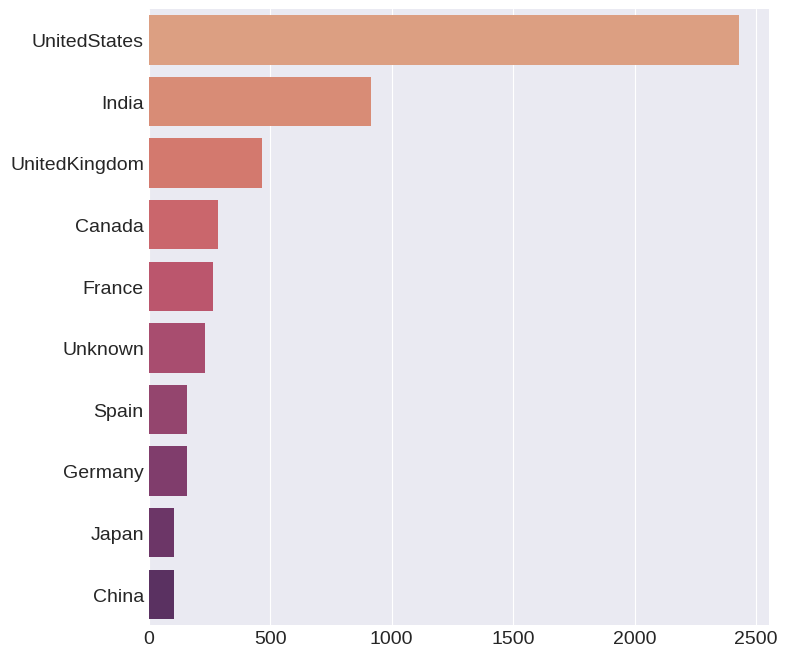

In [33]:
countries_sort = countries_sort[:10]
names = [name for name, value in countries_sort]
values = [value for name, value in countries_sort]

plt.figure(figsize = (8,8))
ax = sns.barplot(x = values, y = names, palette = 'flare')
plt.show()

На первом месте Hollywood, на втором Bollywood и какая-то крупная студия в Великобритании

## Анализ продолжительности фильмов

Чтобы визуализировать продолжительность нужно убрать слово min в столбце duration и поменять тип данных на integer

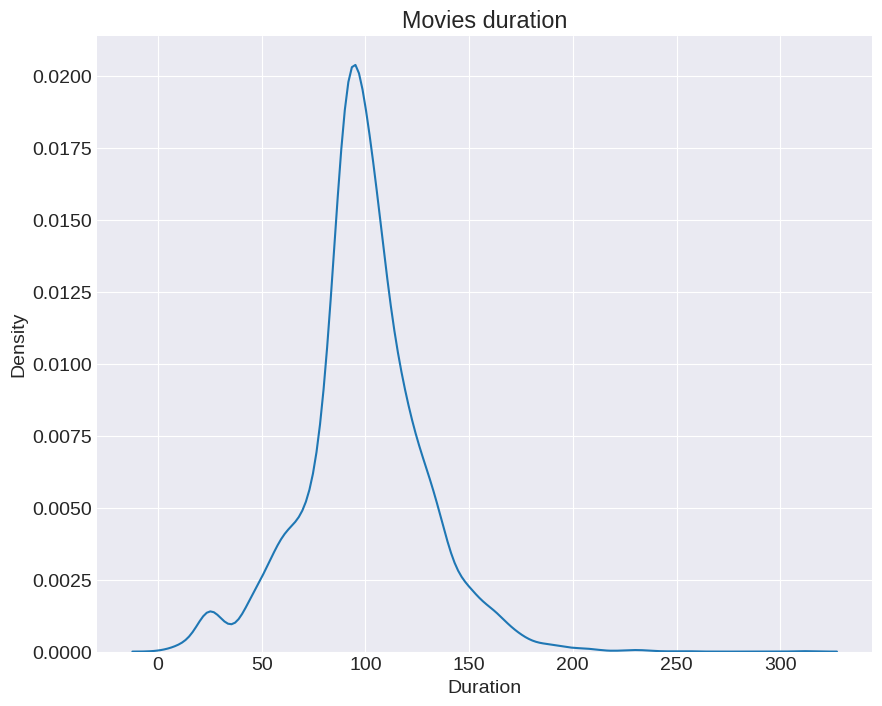

In [34]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration'] = netflix_movies['duration'].astype(int)
plt.figure(figsize = (10,8))
sns.kdeplot(data = netflix_movies['duration'])
plt.title ('Movies duration')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()

In [35]:
netflix_movies['duration'].mean() # среднее значение продолжительности

99.30797842663195

Как видно из графика средняя продолжительность фильмов 80-120 минут и есть маленький бугорок в значении 25 минут "короткометражки"

## Анализ жанров

In [36]:
netflix_movies['listed_in']

1                            Dramas, International Movies
2                     Horror Movies, International Movies
3       Action & Adventure, Independent Movies, Sci-Fi...
4                                                  Dramas
6                     Horror Movies, International Movies
                              ...                        
7781                   Children & Family Movies, Comedies
7782                         Dramas, International Movies
7783       Dramas, International Movies, Music & Musicals
7784    Documentaries, International Movies, Music & M...
7786                      Documentaries, Music & Musicals
Name: listed_in, Length: 5377, dtype: object

Т.к. у нас жанры в группах, разобьем их по одному

In [37]:
from collections import Counter

geners = list(netflix_movies['listed_in'])
gen = []

for i in geners:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))

g = Counter(gen)

In [38]:
geners_sort_mov = sorted(g.items(), key = lambda item : g[item[0]], reverse = True)

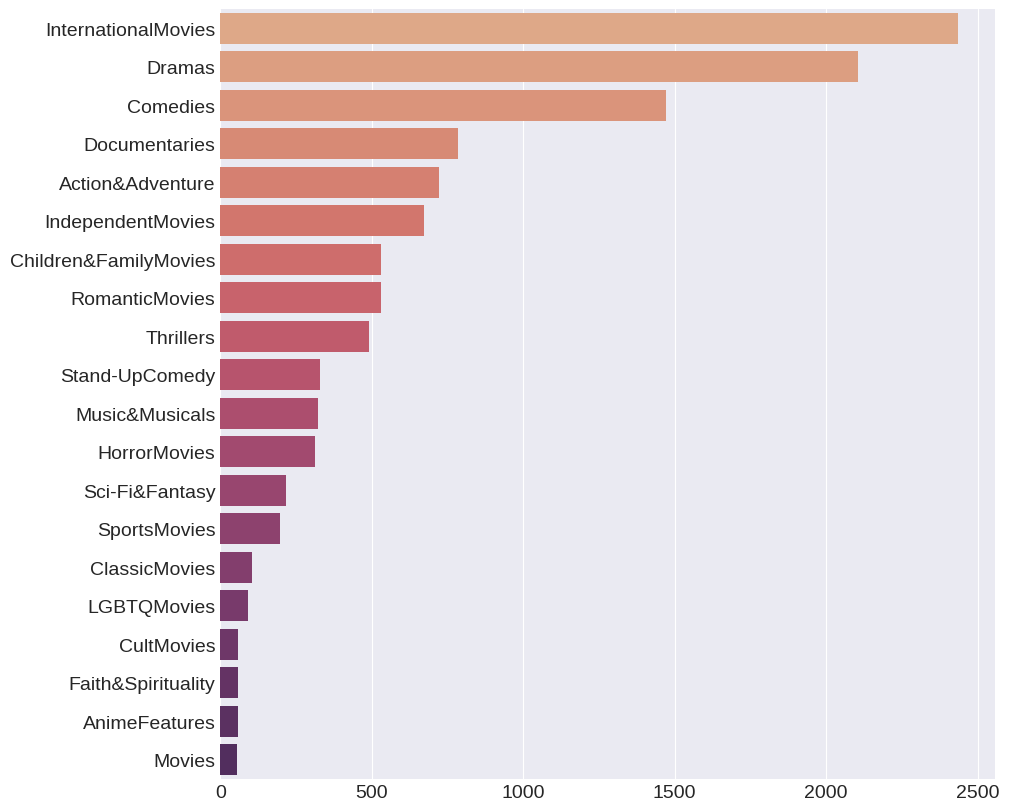

In [39]:
names = [name for name, value in geners_sort_mov]
values = [value for name, value in geners_sort_mov]

plt.figure(figsize = (10,10))
ax = sns.barplot(x = values, y = names, palette = 'flare')
plt.show()

Топовые жанры - это мировое кино, драмы, комедии

## Топ 10 популярных актеров в фильмах

In [40]:
netflix_movies['cast'].dropna()

1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
6       Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...
                              ...                        
7780    Shashank Arora, Shweta Tripathi, Rahul Kumar, ...
7781    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
Name: cast, Length: 4951, dtype: object

In [41]:
def actors_in_country(df,country):
    # создаем копию данных для работы внутри функции
    df_copy = df.copy()
    
    # оставляем только строки с указанной страной
    df_copy = df_copy[df_copy['country'] == country]
    
    # создаем словарь для подсчета количества фильмов для каждого актера 
    actors_dict = {}

    # проходимся по каждой строке и для каждого актера в столбце cast actors_str.split(', ')
    # увеличиваем соответствующее значение в словаре actors_dict
    for actors_str in list(df_copy['cast']):
        if isinstance(actors_str, str):           # для исключения неизвестных актеров
            actors_list = actors_str.split(', ')
            for actor in actors_list:
                if actor not in actors_dict:
                    actors_dict[actor] = 1
                else:
                    actors_dict[actor] += 1

    actors_sort = sorted(actors_dict.items(), key = lambda item : actors_dict[item[0]], reverse = True)
    actors_sort = actors_sort[:10]
    names = [name for name, value in actors_sort]
    values = [value for name, value in actors_sort]
                
    return sns.barplot(x = values, y = names, palette = 'flare')


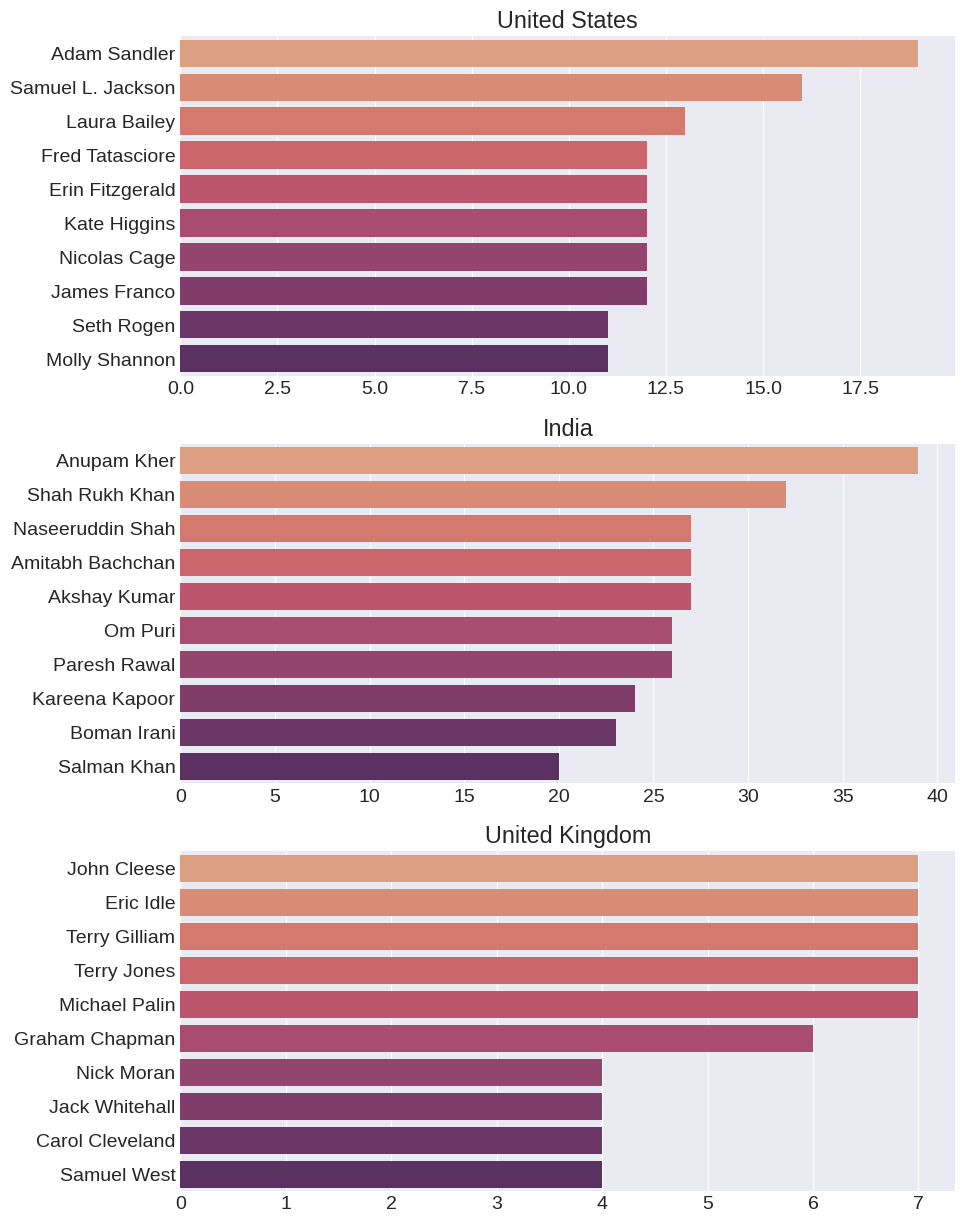

In [42]:
fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(3, 1, 1)
plt.title ('United States')
ax1 = actors_in_country(netflix_movies[['cast', 'country']],'United States')

ax2 = fig.add_subplot(3, 1, 2)
plt.title ('India')
ax2 = actors_in_country(netflix_movies[['cast', 'country']],'India')

ax3 = fig.add_subplot(3, 1, 3)
plt.title ('United Kingdom')
ax3 = actors_in_country(netflix_movies[['cast', 'country']],'United Kingdom')

plt.show()

# Анализ сериалов

## Анализ возрастного рейтинга

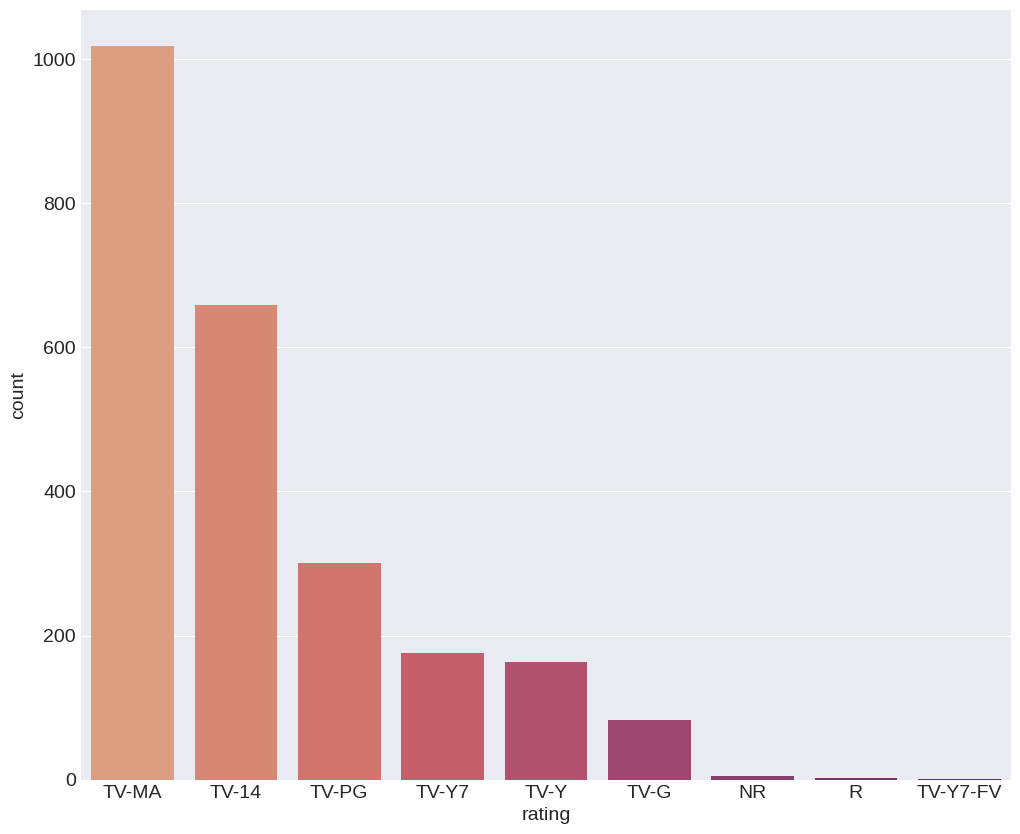

In [43]:
plt.figure(figsize = (12,10))
ax = sns.countplot(x = 'rating', data = netflix_shows, palette = 'flare', order = netflix_shows['rating'].value_counts().index)

## Анализ стран, выпускающих сериалы

Проверим пропуски и заполним их

In [44]:
netflix_shows.isna().sum()

show_id            0
type               0
title              0
director        2226
cast             292
country          277
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [45]:
netflix_shows['country'].fillna('Unknown', inplace = True)

In [46]:
netflix_shows['country'].value_counts()

United States                                                705
Unknown                                                      277
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: country, Length: 184, dtype: int64

Множество стран разбиваем на отдельные

In [47]:
countries_shows = {}                              # словарь стран
count_2 = list(netflix_shows['country'])          # подсчитываем количество стран и групп стран
for i in count_2:                                 # цикл по ним
    i = i.replace(' ', '')                        # удалаяем пробелы, чтобы названия стран шли слитно
    i = list(i.split(','))                        # и разбиваем их через запятую

    for j in i:                                   # проходимся по списку стран в группе
        if j in list(countries_shows.keys()):     # и если данная страна есть в словаре стран,
          countries_shows[j] += 1                 # то прибавляем его в счетчик сериалов
        else:                                     # иначе, если такой страны еще нет в словаре
          countries_shows[j] = 1                  # инициализируем счетчик сериалов с значением 1 для новой страны

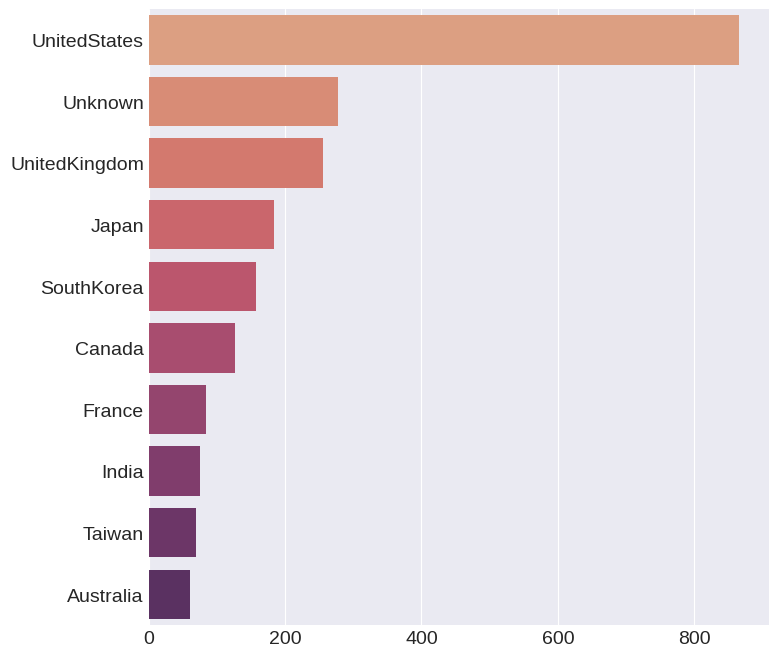

In [48]:
countries_sort_ = sorted(countries_shows.items(), key = lambda item : countries_shows[item[0]], reverse = True)

countries_sort_ = countries_sort_[:10]
names_ = [name for name, value in countries_sort_]
values_ = [value for name, value in countries_sort_]

plt.figure(figsize = (8,8))
ax = sns.barplot(x = values_, y = names_, palette = 'flare')
plt.show()

По сериалам топ-3 (исключая неизвестных производителей) это:
1. США
2. Великобритания
3. Япония

## Сериалы с большим количеством сезонов

In [49]:
features = ['title', 'duration']
durations = netflix_shows[features]
durations

,title,duration
0,3%,4 Seasons
5,46,1 Season
11,1983,1 Season
12,1994,1 Season
16,Feb-09,1 Season
...,...,...
7767,Zindagi Gulzar Hai,1 Season
7775,Zoids Wild,1 Season
7777,Zombie Dumb,2 Seasons
7779,Zona Rosa,1 Season


Уберем слова из durations 

In [ ]:
durations['season_'] = durations['duration'].str.replace(' Season', '')
durations['season_'] = durations['season_'].str.replace('s', '')
durations['season_'] = durations['season_'].astype(int)

In [51]:
durations

,title,duration,season_
0,3%,4 Seasons,4
5,46,1 Season,1
11,1983,1 Season,1
12,1994,1 Season,1
16,Feb-09,1 Season,1
...,...,...,...
7767,Zindagi Gulzar Hai,1 Season,1
7775,Zoids Wild,1 Season,1
7777,Zombie Dumb,2 Seasons,2
7779,Zona Rosa,1 Season,1


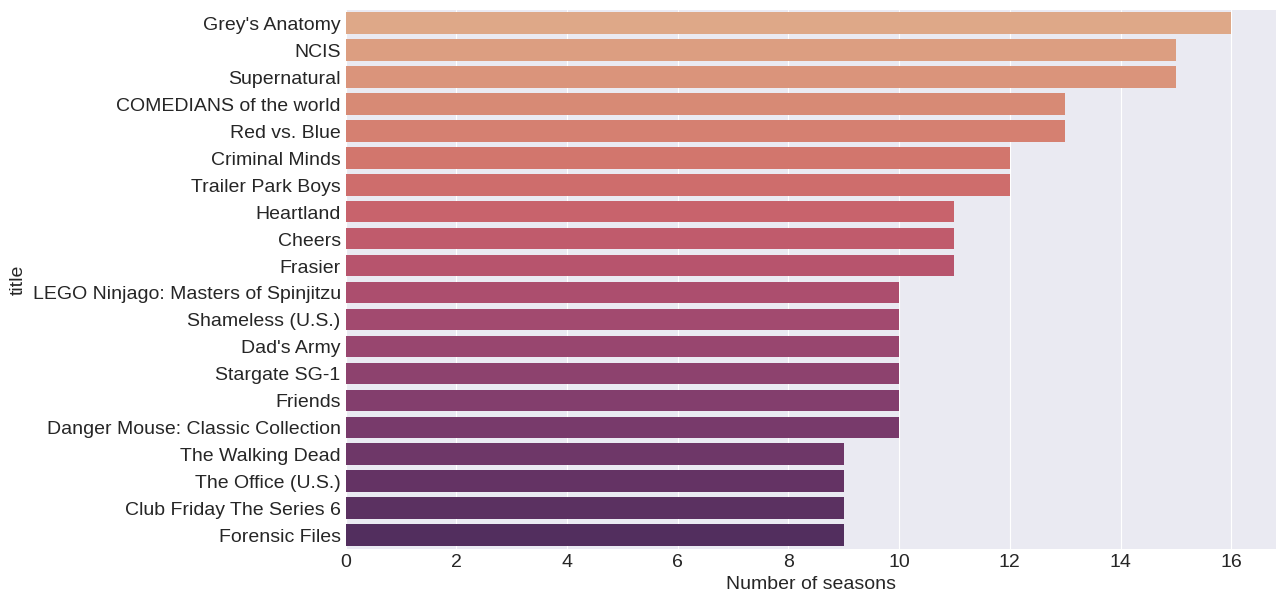

In [52]:
top = durations[['title', 'season_']]
top = top.sort_values(by = 'season_', ascending = False)
top_20 = top[:20]
plt.figure(figsize = (12,7))
ax = sns.barplot(x = top_20['season_'], y = top_20['title'], palette = 'flare')
plt.xlabel('Number of seasons')
plt.show()

Самое большое количество сезонов 16

## Анализ продолжительности сериала

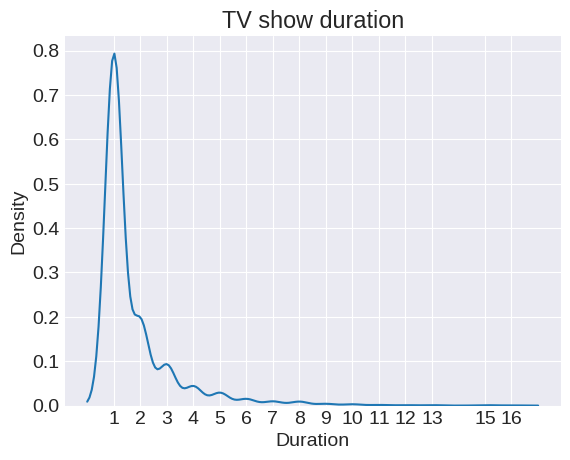

In [53]:
plt.Figure(figsize = (10,8))
sns.kdeplot(data = durations['season_'])
plt.xticks(sorted(durations['season_'].unique()))
plt.title ('TV show duration')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()

Самый частотный это 1 сезон. Возможно, это оптимальная продолжительность для сериала по окупаемости и удержании аудитории или это оптимальная продолжительность для рассказа законченного сюжета, а может быть эти сериалы аудитории не понравились (не окупились), поэтому был выпущен только один сезон.

## Анализ жанров

In [54]:
netflix_shows['listed_in']

0       International TV Shows, TV Dramas, TV Sci-Fi &...
5         International TV Shows, TV Dramas, TV Mysteries
11      Crime TV Shows, International TV Shows, TV Dramas
12      Crime TV Shows, Docuseries, International TV S...
16                      International TV Shows, TV Dramas
                              ...                        
7767    International TV Shows, Romantic TV Shows, TV ...
7775                               Anime Series, Kids' TV
7777               Kids' TV, Korean TV Shows, TV Comedies
7779    International TV Shows, Spanish-Language TV Sh...
7785                   International TV Shows, Reality TV
Name: listed_in, Length: 2410, dtype: object

In [55]:
from collections import Counter

geners = list(netflix_shows['listed_in'])
gen = []

for i in geners:
    i = list(i.split(', '))
    for j in i:
        gen.append(j.replace(' ', ''))

g = Counter(gen)

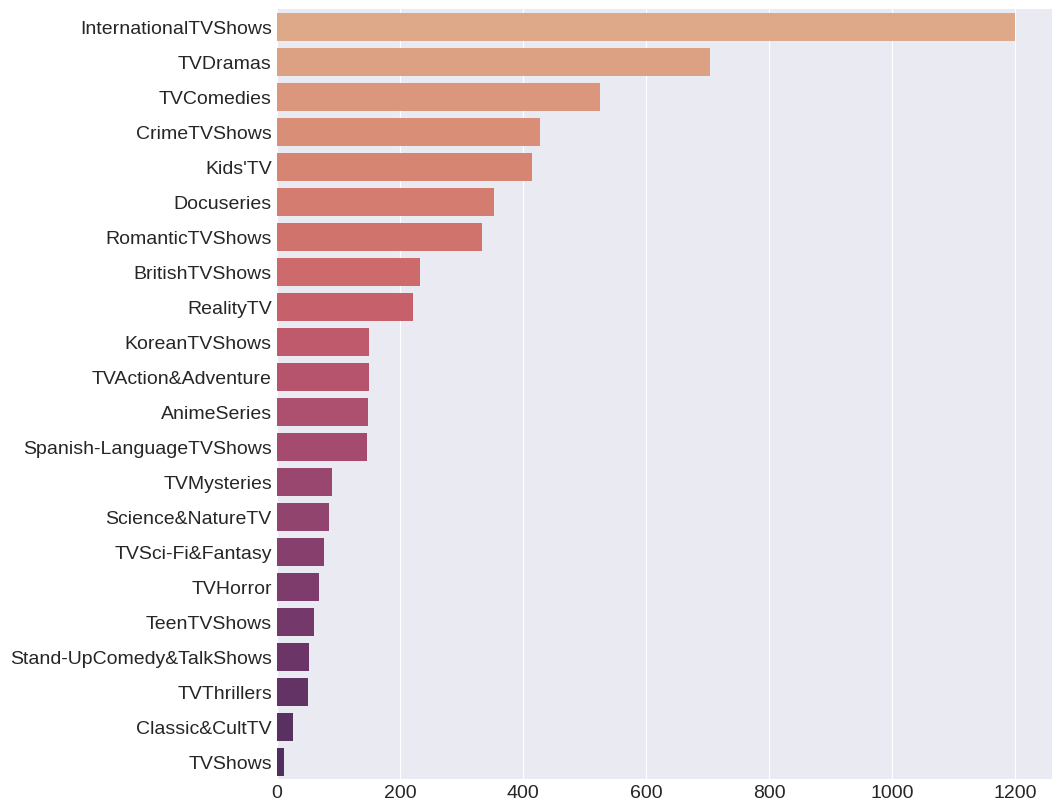

In [56]:
geners_sort = sorted(g.items(), key = lambda item : g[item[0]], reverse = True)
names = [name for name, value in geners_sort]
values = [value for name, value in geners_sort]

plt.figure(figsize = (10,10))
ax = sns.barplot(x = values, y = names, palette = 'flare')
plt.show()

Топовые жанры - это мировое сериалы, драмы, комедии, как и в фильмах

## Топ 10 популярных актеров в сериалах

In [57]:
netflix_shows['cast'].dropna()

0       João Miguel, Bianca Comparato, Michel Gomes, R...
5       Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...
11      Robert Więckiewicz, Maciej Musiał, Michalina O...
16      Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...
24      Bryson Baugus, Emily Neves, Blake Shepard, Pat...
                              ...                        
7759    Michael Johnston, Jessica Gee-George, Christin...
7767    Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...
7775    Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...
7779    Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...
7785                           Adriano Zumbo, Rachel Khoo
Name: cast, Length: 2118, dtype: object

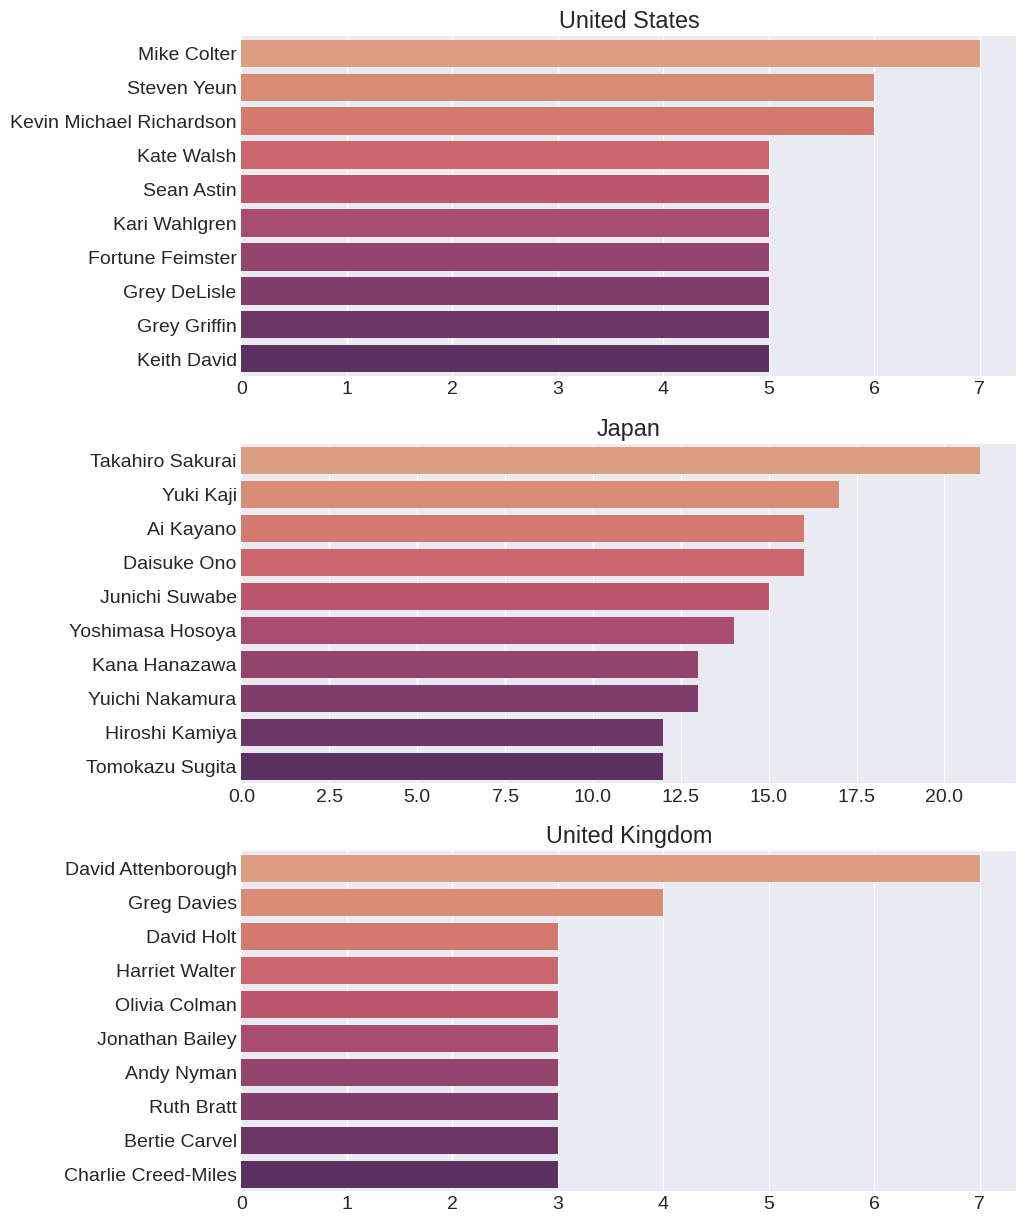

In [58]:
fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(3, 1, 1)
plt.title ('United States')
ax1 = actors_in_country(netflix_shows[['cast', 'country']],'United States')

ax2 = fig.add_subplot(3, 1, 2)
plt.title ('Japan')
ax2 = actors_in_country(netflix_shows[['cast', 'country']],'Japan')

ax3 = fig.add_subplot(3, 1, 3)
plt.title ('United Kingdom')
ax3 = actors_in_country(netflix_shows[['cast', 'country']],'United Kingdom')

plt.show()

# Топ 10 популярных режиссеров 

In [59]:
netflix_movies['director'].dropna()

1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
6         Yasir Al Yasiri
              ...        
7780         Shlok Sharma
7781         Peter Hewitt
7782          Josef Fares
7783          Mozez Singh
7786             Sam Dunn
Name: director, Length: 5214, dtype: object

In [60]:
def directors_in_country(df,country):
    # создаем копию данных для работы внутри функции
    df_copy = df.copy()
    
    # оставляем только строки с указанной страной
    df_copy = df_copy[df_copy['country'] == country]
    
    # создаем словарь для подсчета количества фильмов для каждого режиссера 
    directors_dict = {}

    # проходимся по каждой строке и для каждого режиссера в столбце cast 
    # увеличиваем соответствующее значение в словаре directors_dict
    for directors_str in list(df_copy['director']):
        if isinstance(directors_str, str):           # для исключения неизвестных актеров
            directors_list = directors_str.split(', ')
            for director in directors_list:
                if director not in directors_dict:
                    directors_dict[director] = 1
                else:
                    directors_dict[director] += 1

    directors_sort = sorted(directors_dict.items(), key = lambda item : directors_dict[item[0]], reverse = True)
    directors_sort = directors_sort[:10]
    names = [name for name, value in directors_sort]
    values = [value for name, value in directors_sort]
                
    return sns.barplot(x = values, y = names, palette = 'flare')

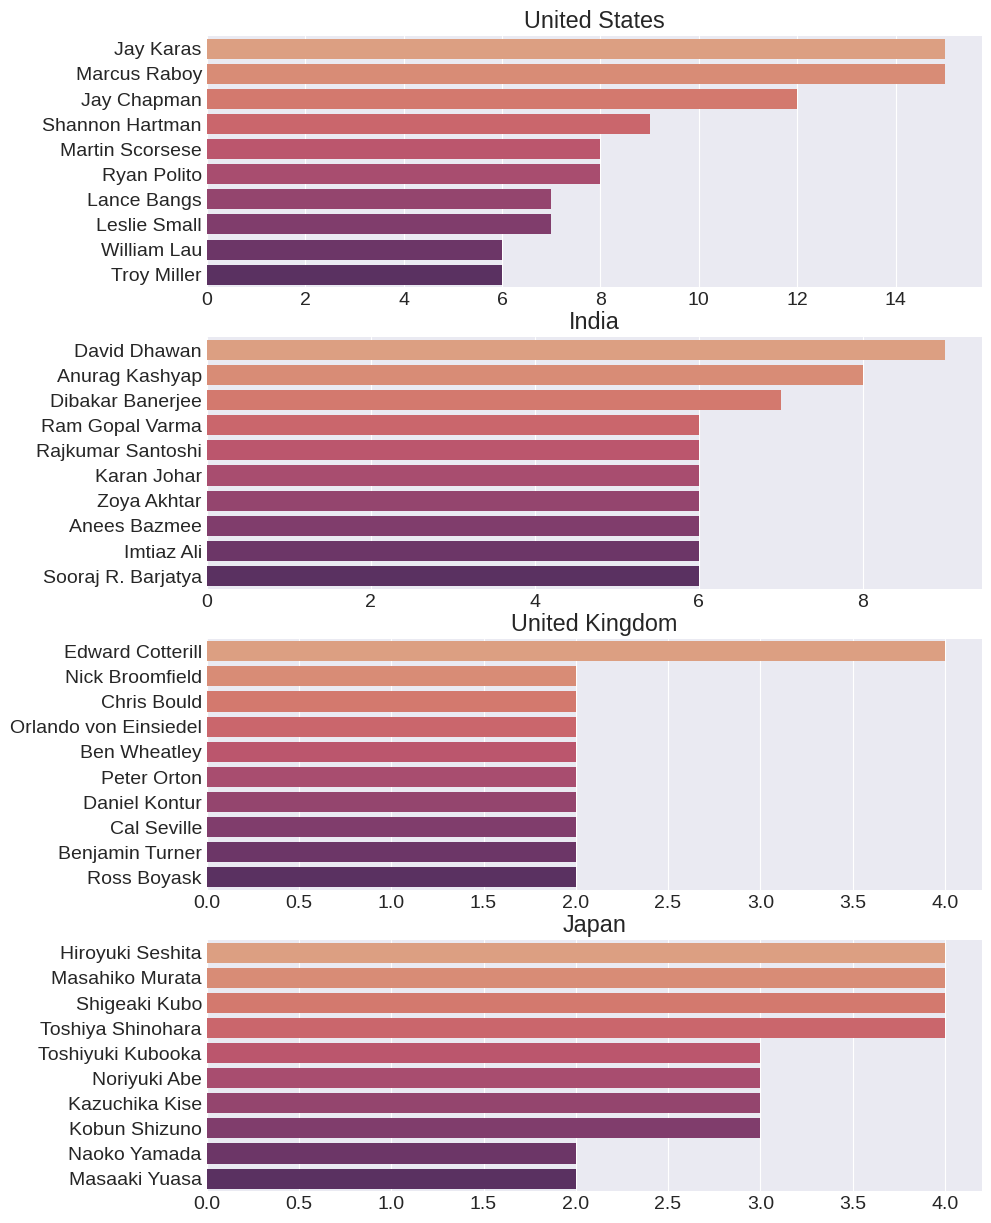

In [61]:
fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(4, 1, 1)
plt.title ('United States')
ax1 = directors_in_country(netflix_overall[['director', 'country']],'United States')

ax2 = fig.add_subplot(4, 1, 2)
plt.title ('India')
ax2 = directors_in_country(netflix_overall[['director', 'country']],'India')

ax3 = fig.add_subplot(4, 1, 3)
plt.title ('United Kingdom')
ax3 = directors_in_country(netflix_overall[['director', 'country']],'United Kingdom')

ax3 = fig.add_subplot(4, 1, 4)
plt.title ('Japan')
ax3 = directors_in_country(netflix_overall[['director', 'country']],'Japan')

plt.show()

# Система рекомендаций (content base)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## Обучение TfidfVectorizer

In [169]:
df = netflix_overall[['listed_in', 'cast', 'rating', 'description', 'title']].copy()
df = df.fillna('')

# преобразуем жанры в список слов
df['listed_in'] = df['listed_in'].apply(lambda x: x.replace(' ', '').split(','))

# преобразуем актеров в список слов
df['cast'] = df['cast'].apply(lambda x: x.replace(' ', '').split(','))

# преобразуем возрастной рейтинг в список слов
df['rating'] = df['rating'].apply(lambda x: x.replace(' ', '').split(','))

# запишем все данные в один столбец через пробел
df['sum'] = df.astype(str).apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df['sum']

0       ['InternationalTVShows', 'TVDramas', 'TVSci-Fi...
1       ['Dramas', 'InternationalMovies'] ['DemiánBich...
2       ['HorrorMovies', 'InternationalMovies'] ['Tedd...
3       ['Action&Adventure', 'IndependentMovies', 'Sci...
4       ['Dramas'] ['JimSturgess', 'KevinSpacey', 'Kat...
                              ...                        
7782    ['Dramas', 'InternationalMovies'] ['ImadCreidi...
7783    ['Dramas', 'InternationalMovies', 'Music&Music...
7784    ['Documentaries', 'InternationalMovies', 'Musi...
7785    ['InternationalTVShows', 'RealityTV'] ['Adrian...
7786    ['Documentaries', 'Music&Musicals'] [''] ['TV-...
Name: sum, Length: 7787, dtype: object

In [140]:
# создаем матрицу описания
tfidf = CountVectorizer(stop_words = 'english') # стоп слова английские (предлоги, местоимения, артикли и т.д.)
desc_matrix = tfidf.fit_transform(df['sum'])


## Косинусная похожесть

In [141]:
from sklearn.metrics.pairwise import cosine_similarity

# вычисляем косинусную схожесть между всеми фильмами/сериалами
desc_model = cosine_similarity(desc_matrix)

In [142]:
indices = pd.Series(df.index, index = df['title']).drop_duplicates()

desc_model = pd.DataFrame(desc_model)
desc_model.columns = indices.index

desc_model['title'] = indices.index
desc_model = desc_model.set_index('title')
desc_model

title,3%,7:19,23:59,9,21,46,122,187,706,1920,...,Zombie Dumb,Zombieland,Zona Rosa,Zoo,Zoom,Zozo,Zubaan,Zulu Man in Japan,Zumbo's Just Desserts,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
title,,,,,,,,,,,,,,,,,,,,,
3%,1.000000,0.071611,0.035136,0.064550,0.000000,0.135613,0.076139,0.000000,0.034503,0.074536,...,0.074536,0.000000,0.103510,0.107417,0.000000,0.069007,0.032791,0.074536,0.070273,0.073030
7:19,0.071611,1.000000,0.037743,0.000000,0.035806,0.072836,0.122679,0.069338,0.074125,0.120096,...,0.080064,0.000000,0.111187,0.153846,0.037062,0.148250,0.105670,0.200160,0.037743,0.078446
23:59,0.035136,0.037743,1.000000,0.000000,0.000000,0.000000,0.080257,0.000000,0.072739,0.078567,...,0.000000,0.039284,0.000000,0.075485,0.000000,0.036370,0.034565,0.039284,0.000000,0.000000
9,0.064550,0.000000,0.000000,1.000000,0.096825,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.036084,0.000000,0.034669,0.033408,0.000000,0.031750,0.000000,0.034021,0.000000
21,0.000000,0.035806,0.000000,0.096825,1.000000,0.000000,0.000000,0.064550,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.035806,0.034503,0.034503,0.032791,0.000000,0.035136,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zozo,0.069007,0.148250,0.036370,0.000000,0.034503,0.070186,0.118217,0.033408,0.071429,0.115728,...,0.077152,0.000000,0.071429,0.148250,0.000000,1.000000,0.135769,0.115728,0.036370,0.113389
Zubaan,0.032791,0.105670,0.034565,0.031750,0.032791,0.033352,0.074901,0.031750,0.101827,0.073324,...,0.073324,0.000000,0.033942,0.105670,0.000000,0.135769,1.000000,0.183309,0.034565,0.143684
Zulu Man in Japan,0.074536,0.200160,0.039284,0.000000,0.000000,0.075810,0.127688,0.036084,0.077152,0.125000,...,0.083333,0.000000,0.115728,0.120096,0.000000,0.115728,0.183309,1.000000,0.039284,0.244949


## Рекомендации, основанные на информации об актерах, жанре, возрастном рейтинге и описании

In [143]:
def get_recommendations(title, cosine_sim = desc_model):
    idx = indices[title]

    # получаем похожести для этого фильма
    sim_scores = list(enumerate(cosine_sim.loc[title]))

    # сортируем фильмы на основе похожести
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    sim_scores = sim_scores[1:11]

    # получаем индексы фильма
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [160]:
# выведем описание фильма Last Breath
df[df['title'] == 'Supernatural'].listed_in.iloc[0]

'Classic&CultTV,TVAction&Adventure,TVHorror'

In [161]:
df[df['title'] == 'Supernatural'].cast.iloc[0]

'JaredPadalecki,JensenAckles,MarkSheppard,MishaCollins,JimBeaver,AndreaMenard,SamanthaSmith,MarkPellegrino,AlexanderCalvert'

In [162]:
df[df['title'] == 'Supernatural'].description.iloc[0]

'Siblings Dean and Sam crisscross the country, investigating paranormal activity and picking fights with demons, ghosts and monsters.'

In [163]:
df[df['title'] == 'Supernatural'].rating.iloc[0]

'TV-14'

In [164]:
get_recommendations('Supernatural')

632              Avatar: The Last Airbender
2292                    From Dusk Till Dawn
515                         Angel 'N' Devil
2658                                  Haven
534             Anjaan: Special Crimes Unit
4766                             Paranormal
6958                   The Umbrella Academy
5785                              Star Trek
6953    The Twilight Zone (Original Series)
5787                  Star Trek: Enterprise
Name: title, dtype: object

In [168]:
df[df['title'] == 'Avatar: The Last Airbender'].listed_in.iloc[0]

"Classic&CultTV,Kids'TV,TVAction&Adventure"

In [167]:
df[df['title'] == 'Avatar: The Last Airbender'].cast.iloc[0]

'ZachTyler,MaeWhitman,JackDeSena,DeeBradleyBaker,DanteBasco,JessieFlower,MakoIwamatsu'

In [166]:
df[df['title'] == 'Avatar: The Last Airbender'].rating.iloc[0]

'TV-Y7'

In [165]:
df[df['title'] == 'Avatar: The Last Airbender'].description.iloc[0]

"Siblings Katara and Sokka wake young Aang from a long hibernation and learn he's an Avatar, whose air-bending powers can defeat the evil Fire Nation."